In [7]:
import pandas as pd
a = pd.read_csv('src/factors_table.csv', index_col = 0)
a.T

Factors,FFT_1Y_LR_M,ARIMA_1Y_PCT_M_AROPT,MA20_strat1
Return,100.0,120.0,13.0
Sharpe,1.5,1.7,0.8
CAGR,10.0,10.0,2.0
MDD,12.0,13.0,20.0


In [1]:
import pandas as pd
close = pd.read_parquet('database/Adj_close.parquet')
df = close[close.index >= '2013-01-01']
df = df.dropna(how='all', axis=1)
df = df.dropna(how='all', axis=0)


In [60]:
ma20 = df.rolling(window=20).mean()
diff_ma20 = df/ma20 - 1
diff_ma20.dropna(how='all', axis=0, inplace=True)
diff_ma20
# def get_demean_weighting(self, data):
df1 = diff_ma20.dropna(axis='columns', how='all').copy()
demean = df1.sub(df1.mean(axis=1), axis=0)
weighting = demean.div(demean.abs().sum(axis=1), axis=0)

import matplotlib.pyplot as plt

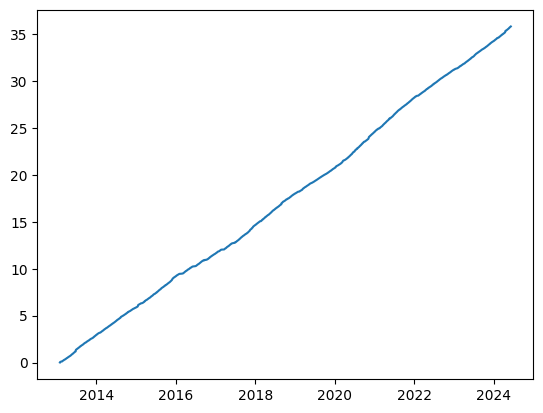

In [72]:
pct_change = close[close.index >= weighting.index[0]].pct_change(fill_method=None)
pct_change_shift1 = pct_change.shift(-1)
pct_change_lag1 = pct_change.shift(0)

def get_cumsum(weighting_da, pct_change_shift1):

    pct_change_shift1.dropna(how='all', axis=0, inplace=True)
    weighting_da = weighting[weighting.index >= pct_change_shift1.index[0]]
    nav_df = (weighting_da * pct_change_shift1)
    nav = nav_df.sum(axis=1)
    
    # remove abnormal returns
    average = np.mean(nav)
    std = np.std(nav)
    nav.loc[nav[nav > average + 3*std].index] = 0
    cumsum = nav.cumsum()
    return cumsum

cumsum_close_buyin = get_cumsum(weighting_da, pct_change_shift1)
cumsum_close_lag1_buyin = get_cumsum(weighting_da, pct_change_lag1)
plt.plot(cumsum_close_lag1_buyin)